In [2]:
#imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

In [3]:
path="../src/data/NetBIOS.csv"

In [4]:
df= pd.read_csv(path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,302291,172.16.0.5-192.168.50.4-648-16174-17,172.16.0.5,648,192.168.50.4,16174,17,2018-11-03 10:01:48.920574,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
1,341625,172.16.0.5-192.168.50.4-861-34200-17,172.16.0.5,861,192.168.50.4,34200,17,2018-11-03 10:01:48.920625,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
2,245313,172.16.0.5-192.168.50.4-862-4750-17,172.16.0.5,862,192.168.50.4,4750,17,2018-11-03 10:01:48.920685,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
3,266106,172.16.0.5-192.168.50.4-863-4443-17,172.16.0.5,863,192.168.50.4,4443,17,2018-11-03 10:01:48.921008,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
4,47182,172.16.0.5-192.168.50.4-864-48627-17,172.16.0.5,864,192.168.50.4,48627,17,2018-11-03 10:01:48.921010,48,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS


In [7]:
#COUNT NOT nan VALUES
df.count()

Unnamed: 0         3455899
Flow ID            3455899
 Source IP         3455899
 Source Port       3455899
 Destination IP    3455899
                    ...   
 Idle Max          3455899
 Idle Min          3455899
SimillarHTTP       3455899
 Inbound           3455899
 Label             3455899
Length: 88, dtype: int64

In [8]:
#count nan values
df.isna().sum()

Unnamed: 0         0
Flow ID            0
 Source IP         0
 Source Port       0
 Destination IP    0
                  ..
 Idle Max          0
 Idle Min          0
SimillarHTTP       0
 Inbound           0
 Label             0
Length: 88, dtype: int64

In [9]:
df_with_no_nulls = df.dropna()

In [10]:
len(df_with_no_nulls)

3455893

In [11]:
df_with_no_nulls.apply(pd.Series.nunique)

Unnamed: 0          347966
Flow ID            3010837
 Source IP              86
 Source Port          1243
 Destination IP        140
                    ...   
 Idle Max             4127
 Idle Min             4127
SimillarHTTP            23
 Inbound                 2
 Label                   2
Length: 88, dtype: int64

In [12]:
df_with_no_nulls.head(5)

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,302291,172.16.0.5-192.168.50.4-648-16174-17,172.16.0.5,648,192.168.50.4,16174,17,2018-11-03 10:01:48.920574,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
1,341625,172.16.0.5-192.168.50.4-861-34200-17,172.16.0.5,861,192.168.50.4,34200,17,2018-11-03 10:01:48.920625,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
2,245313,172.16.0.5-192.168.50.4-862-4750-17,172.16.0.5,862,192.168.50.4,4750,17,2018-11-03 10:01:48.920685,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
3,266106,172.16.0.5-192.168.50.4-863-4443-17,172.16.0.5,863,192.168.50.4,4443,17,2018-11-03 10:01:48.921008,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
4,47182,172.16.0.5-192.168.50.4-864-48627-17,172.16.0.5,864,192.168.50.4,48627,17,2018-11-03 10:01:48.921010,48,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS


In [13]:
dropped_data=df_with_no_nulls

In [14]:
dropped_data.drop(dropped_data.columns[[0, 1, 2, 4, 7, 21, 22,85]], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
dropped_data

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,648,16174,17,1,2,0,458.0,0.0,229.0,229.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NetBIOS
1,861,34200,17,1,2,0,458.0,0.0,229.0,229.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NetBIOS
2,862,4750,17,1,2,0,458.0,0.0,229.0,229.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NetBIOS
3,863,4443,17,1,2,0,458.0,0.0,229.0,229.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NetBIOS
4,864,48627,17,48,2,0,458.0,0.0,229.0,229.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NetBIOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3455894,865,13711,17,1,2,0,458.0,0.0,229.0,229.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NetBIOS
3455895,866,65260,17,48,2,0,458.0,0.0,229.0,229.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NetBIOS
3455896,867,48342,17,1,2,0,458.0,0.0,229.0,229.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NetBIOS
3455897,868,64931,17,1,2,0,458.0,0.0,229.0,229.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NetBIOS


In [16]:
data = dropped_data.sample(frac =.2)
data.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
2841314,663,5574,17,1,2,0,458.0,0.0,229.0,229.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NetBIOS
1004766,658,33311,17,1,2,0,530.0,0.0,265.0,265.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NetBIOS
3173734,832,33064,17,1,2,0,458.0,0.0,229.0,229.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NetBIOS
3431611,539,47375,17,47,2,0,458.0,0.0,229.0,229.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NetBIOS
3442875,568,12429,17,47,2,0,458.0,0.0,229.0,229.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NetBIOS


In [17]:
len(data)

691179

In [18]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [20]:
import collections
collections.Counter(y_train)

Counter({'BENIGN': 168, 'NetBIOS': 462921})

In [21]:
from imblearn.over_sampling import SMOTE
sm= SMOTE(random_state=2)
x_train_res, y_train_res= sm.fit_resample(x_train, y_train)

In [22]:
import collections
collections.Counter(y_train_res)

Counter({'BENIGN': 462921, 'NetBIOS': 462921})

In [23]:
#model gradient boosting
gbc= GradientBoostingClassifier( random_state=0)
gbc = gbc.fit(x_train_res , y_train_res)
gbc_y_pred= gbc.predict(x_test)

In [24]:
accuracy_Gradient_Boosting = accuracy_score(y_true=y_test, y_pred=gbc_y_pred)*100
print("accuracy_Gradient_Boosting : ",accuracy_Gradient_Boosting,"%")

accuracy_Gradient_Boosting :  99.99780788285327 %


In [25]:
print(classification_report(y_true=y_test, y_pred=gbc_y_pred))

              precision    recall  f1-score   support

      BENIGN       0.96      0.99      0.97        89
     NetBIOS       1.00      1.00      1.00    228001

    accuracy                           1.00    228090
   macro avg       0.98      0.99      0.99    228090
weighted avg       1.00      1.00      1.00    228090



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


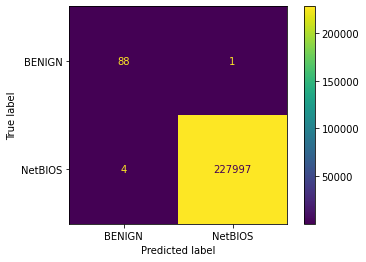

In [26]:
plot_confusion_matrix(gbc, x_test, y_test) 
plt.show()

In [27]:
import pickle
filename = 'GB.sav'
pickle.dump(gbc, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9999780788285326
